<h1>Data Analysis Interview</h1>
<h3>Part 1 ‑ Exploratory data analysis</h3>
<p><b>NOTE: </b>The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.</p>

In [21]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(17,7)})

import json

from datetime import datetime, timedelta

<h3>WRANGLING...</h3>

In [22]:
# open json file and convert it into DataFrame
def json_to_df(path):
    """Converting JSON file into DF"""
    temp = {}
    with open(path, mode='r') as rf:
        data = json.load(rf)
        for key, val in data.items():
            temp[key] = val
    
    df = pd.DataFrame(temp)
    return df

In [23]:
path = "./logins.json"
df = json_to_df(path)
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [24]:
#observe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [25]:
# convert to datetime type and sort it
df['login_time'] = pd.to_datetime(df['login_time'])
df = df.sort_values(by='login_time', ignore_index=True)
df.dtypes, df.head()

(login_time    datetime64[ns]
 dtype: object,
            login_time
 0 1970-01-01 20:12:16
 1 1970-01-01 20:13:18
 2 1970-01-01 20:16:10
 3 1970-01-01 20:16:36
 4 1970-01-01 20:16:37)

In [26]:
# creading a new column
df['num_times'] = 1
df.head(3)

,login_time,num_times
0,1970-01-01 20:12:16,1
1,1970-01-01 20:13:18,1
2,1970-01-01 20:16:10,1


In [27]:
# converting to 15 mins time interval
df_resampled = df.resample('15min', on='login_time').num_times.sum()
df_resampled

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: num_times, Length: 9788, dtype: int64

In [28]:
# converting to DataFame and reseting index
df_converted = df_resampled.to_frame()
df = df_converted.reset_index()
df

,login_time,num_times
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


<h3>EDA...</h3>

Text(0.5, 1.0, 'General Plot')

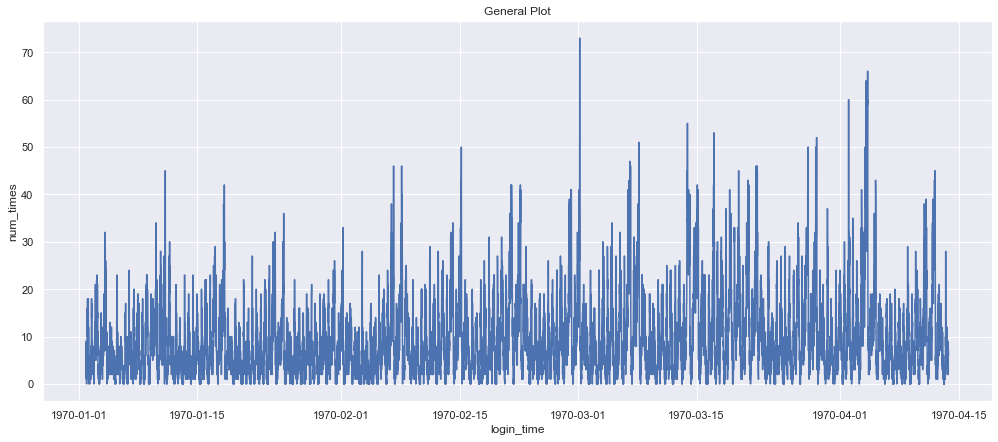

In [29]:
# exploring
sns.lineplot(x='login_time', y='num_times', data=df).set_title('General Plot')

<p><b>NOTE: </b>Now, we'll be looking at aggregation based on days, weeks, and months.</p>

In [30]:
# extracting 'human' features
def extr_features(df, col_name):
    df['hour'] = df[col_name].apply(lambda x: x.hour)
    df['times_of_day'] = df[col_name].apply(lambda x: 'night' if (x.hour >= 0 and x.hour < 6) 
                                    else ('morning' if (x.hour >= 6 and x.hour < 12) 
                                          else ('afternoon' if (x.hour >= 12 and x.hour < 18) else 'evening'))  )
    df['weekday'] = df[col_name].apply(lambda x: x.weekday())
    df['day_name'] = df[col_name].apply(lambda x: x.day_name())
    df['day_of_month'] = df[col_name].apply(lambda x: x.day)
    df['week_num'] = df[col_name].apply(lambda x: x.week)
    df['month'] = pd.DatetimeIndex(df[col_name]).month
    df['month_name'] = df[col_name].apply(lambda x: x.month_name())
    df['date'] = df[col_name].apply(lambda x: x.date())
    
    return df

In [31]:
# extracting features
df = extr_features(df, 'login_time')
df.sample(10)

,login_time,num_times,hour,times_of_day,weekday,day_name,day_of_month,week_num,month,month_name,date
1420,1970-01-16 15:00:00,6,15,afternoon,4,Friday,16,3,1,January,1970-01-16
4053,1970-02-13 01:15:00,11,1,night,4,Friday,13,7,2,February,1970-02-13
1714,1970-01-19 16:30:00,2,16,afternoon,0,Monday,19,4,1,January,1970-01-19
9151,1970-04-07 03:45:00,1,3,night,1,Tuesday,7,15,4,April,1970-04-07
3084,1970-02-02 23:00:00,8,23,evening,0,Monday,2,6,2,February,1970-02-02
4595,1970-02-18 16:45:00,3,16,afternoon,2,Wednesday,18,8,2,February,1970-02-18
4902,1970-02-21 21:30:00,21,21,evening,5,Saturday,21,8,2,February,1970-02-21
1288,1970-01-15 06:00:00,0,6,morning,3,Thursday,15,3,1,January,1970-01-15
2024,1970-01-22 22:00:00,6,22,evening,3,Thursday,22,4,1,January,1970-01-22
5829,1970-03-03 13:15:00,8,13,afternoon,1,Tuesday,3,10,3,March,1970-03-03


In [32]:
# by hours
def group_and_graph(df, col_name):
    df_temp = df.groupby([col_name]).num_times.sum()
    df_temp = df_temp.reset_index()
    sns.lineplot(x=col_name, y='num_times', data=df_temp).set_title('By ' + col_name)
    plt.show()

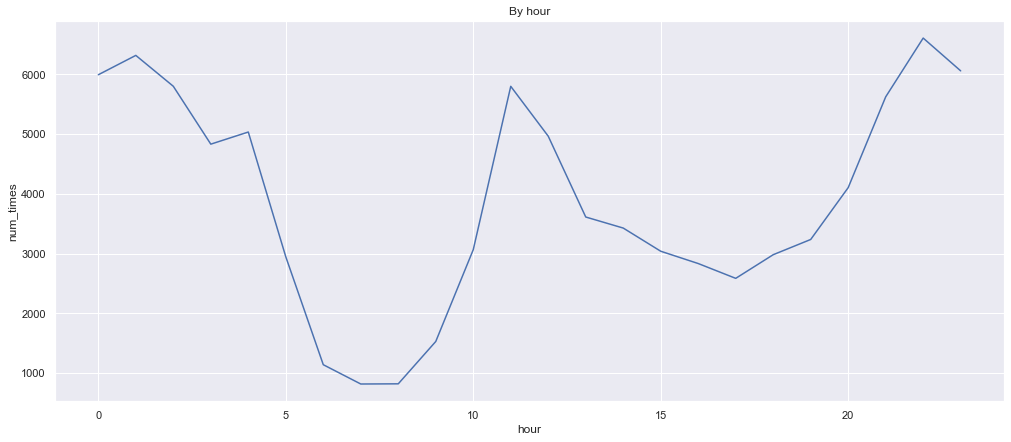

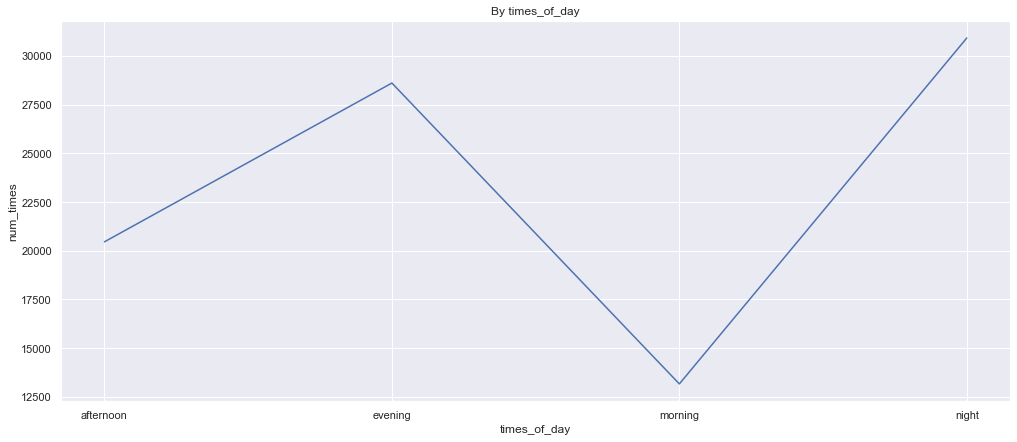

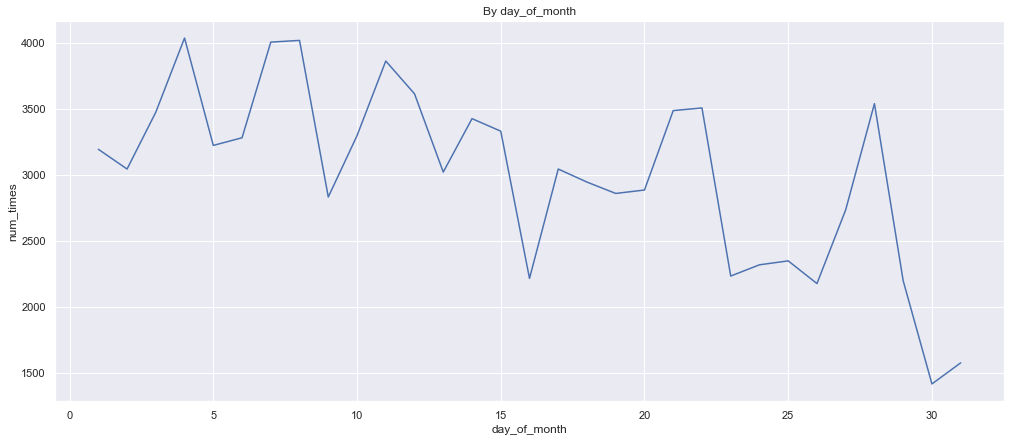

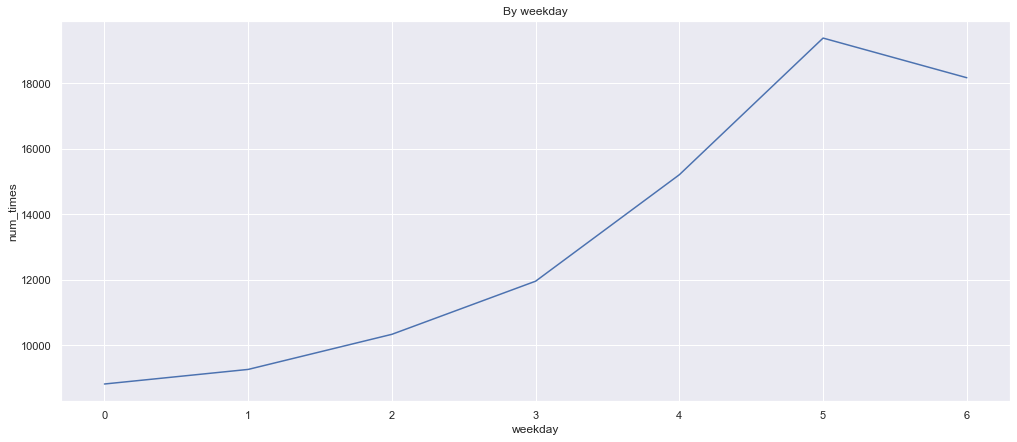

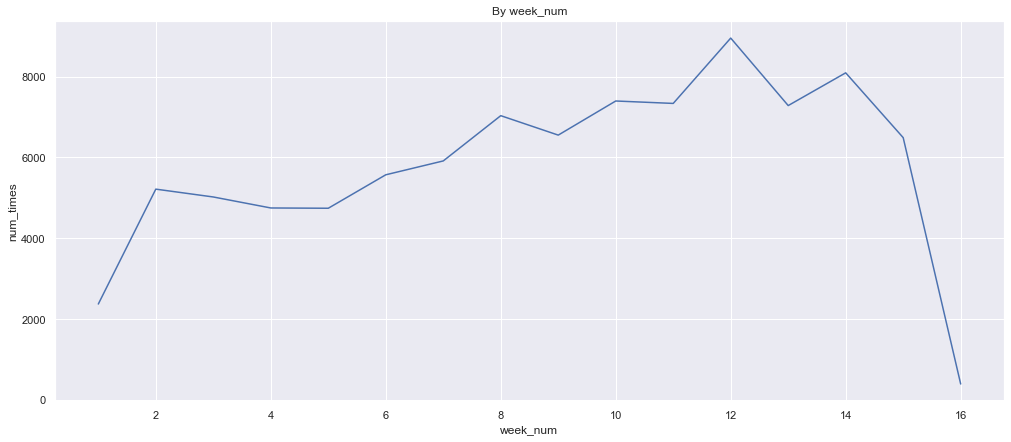

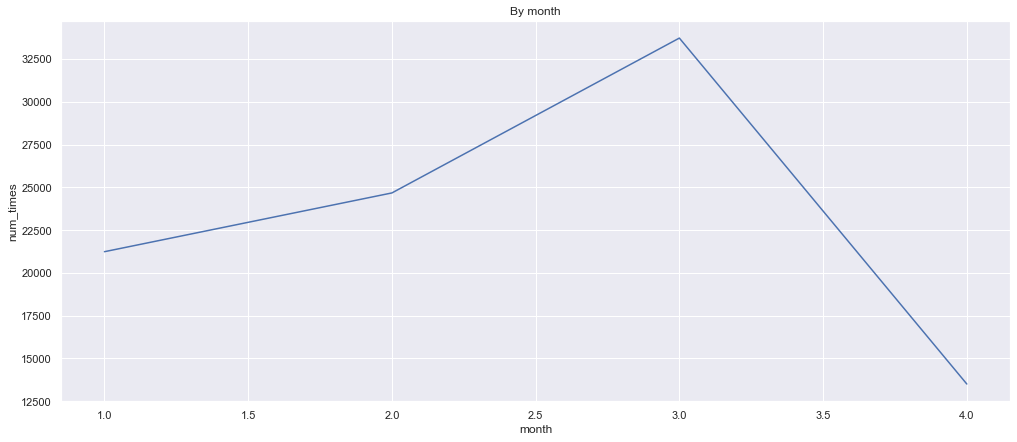

In [33]:
list_of_groups = ['hour', 'times_of_day', 'day_of_month', 'weekday', 'week_num', 'month']
for i in list_of_groups:
    group_and_graph(df, i)

<h3>STATS...</h3>

In [34]:
df['num_times'].describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: num_times, dtype: float64

<AxesSubplot:xlabel='num_times', ylabel='Count'>

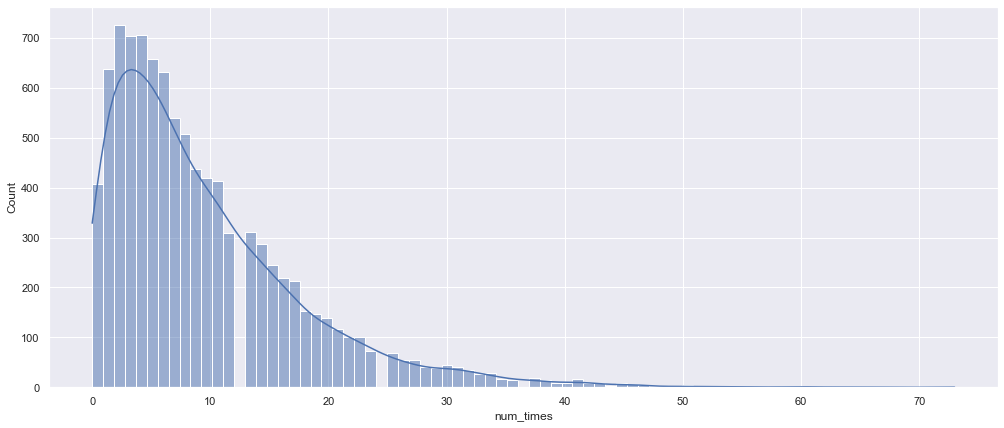

In [35]:
sns.histplot(data=df, x="num_times", kde=True)

<AxesSubplot:xlabel='num_times'>

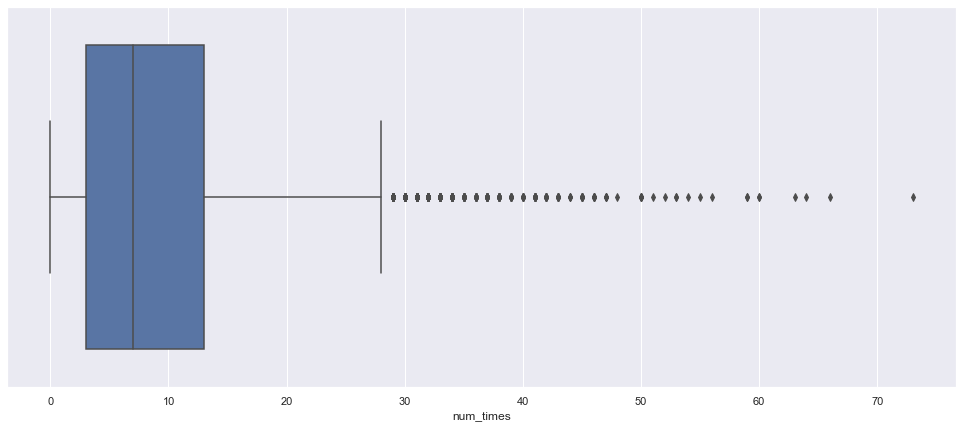

In [36]:
sns.boxplot(x=df["num_times"])

<h3>SUMMARY...</h3>
<p>Looking hourly, we can see that most activities happen around 12:00 pm and 22:00-23:00 pm. Grouping by times of day we can recognize that the picture is slightly different now. Most activities occur during the evening and night. Also, we could say that that there is a clear view of activity increase that starts from Monday (low) and gets its pick on Saturday (high). Additionally, we could say the activity progresses from low (January) to high (the end of March and the beginning of April).  After the first week of April, it (log_activities) rapidly drops (probably the loss of data or malfunction). March is the most log_active month. And activities eventually drop from the beginning of each month.
<br /><br />Based on the histogram we could say that our data (log activities) is skewed to the right (not normally distributed). Moreover, thanks to the boxplot we can see some outliers (abnormal behavior).
Most important features: 'num_times', 'hour', 'times_of_day', 'weekday', 'week_num', 'month'.
<br /><br />Cycling: there are definitely some patterns. The activities usually start happening during lunchtime, after work, and within the midnight. Also, there is a monthly pattern. The highest activity happens at the beginning of the month and slowly going down (with some spikes during the week).</p>